# AGE vs INCIDENCE OF HEART DISEASE

## BACKGROUND:
Our group started with a mostly clean dataset from kaggle.com, "Cardiovascular Diseases Risk Prediction Dataset", which was derived from the "2021 BRFSS Dataset from the CDC". The kaggle.com author chose 19 of the 304 unique variables relating "to lifestyle factors of a person that can be contributed to being at risk with any form of Cardiovascular Diseases".

## QUESTION: 
Looking at the provided dataset from kaggle.com, is there a relationship between age and the incidence of cardio vascular (heart) disease (CVD)? Additionally, based on the collected data, are there comorbidities or other factors which conincide with a greater/lower incidence of heart disease?

In [26]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

#Import csv data and use Pandas to create a Data Frame
cleaned_data = pd.read_csv("../Resources/Cleaned_CVD.csv")

# # drop unamed excess column
# cleaned_data = cleaned_data.drop(["Unnamed: 0"], axis=1)
# cleaned_data


,General Health,Checkup,Exercise,Heart Disease,Skin Cancer,Other Cancer,Depression,Diabetes,Arthritis,Sex,Age Category,Height (cm),Weight (kg),BMI,Smoking History,Alcohol (Servings/Month),Fruit (Servings/Month),Green Vegetables (Servings/Month),Fried Potato (Servings/Month)
0,Poor,<2,No,No,No,No,No,None,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,<1,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,<1,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,<1,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,<1,No,No,No,No,No,None,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308849,Very Good,<1,Yes,No,No,No,No,None,No,Male,25-29,168.0,81.65,29.05,No,4.0,30.0,8.0,0.0
308850,Fair,<5,Yes,No,No,No,No,Yes,No,Male,65-69,180.0,69.85,21.48,No,8.0,15.0,60.0,4.0
308851,Very Good,5+,Yes,No,No,No,Yes,Pregnacy-Induced,No,Female,30-34,157.0,61.23,24.69,Yes,4.0,40.0,8.0,4.0
308852,Very Good,<1,Yes,No,No,No,No,None,No,Male,65-69,183.0,79.38,23.73,No,3.0,30.0,12.0,0.0


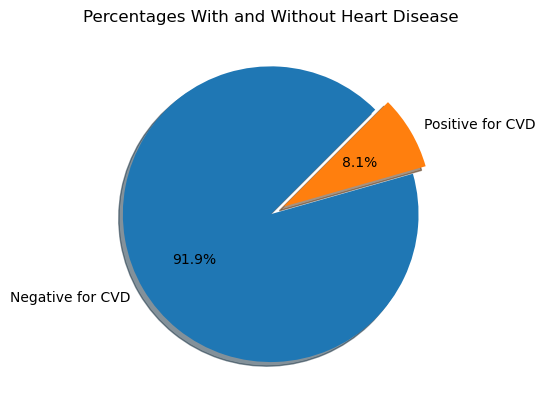

In [31]:
# Want to determine the correlations between age along with other factors and incidents of heart disease.
# start with pie chart showing what percentages of those surveyed have heart disease
# get len of dataframe
tot_survey = len(cleaned_data)
tot_survey

# create an exploded pie chart showing percent heart disease
labels = ["Negative for CVD", "Positive for CVD"]
sizes = cleaned_data["Heart Disease"].value_counts()

explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=45)
plt.title("Percentages With and Without Heart Disease")

plt.savefig("Images/percent_hd_pie.png")
plt.show()


# % Positive for CVD vs % Negative for CVD
We see from the pie chart above roughly 8% of the total population of approximately 309k surveyed were Positive for CVD.

Let's explore whether there is a correlation between Age and the incidence of CVD, along with other possible contributing factors we may see in the data.

First, we need to take a look at the "Age Category" data and determine if we see a skew in the prevelance of heart disease at certain ages.

In [4]:
# Pos HD counts by age group
pos_hd = cleaned_data.loc[cleaned_data["Heart Disease"] == "Yes"]
neg_hd = cleaned_data.loc[cleaned_data["Heart Disease"] == "No"]

print(len(pos_hd))
age_counts = pos_hd["Age Category"].value_counts()
age_counts

24971


80+      4856
70-74    4561
65-69    3823
75-79    3752
60-64    3012
55-59    1991
50-54    1181
45-49     678
40-44     435
35-39     274
30-34     201
25-29     113
18-24      94
Name: Age Category, dtype: int64

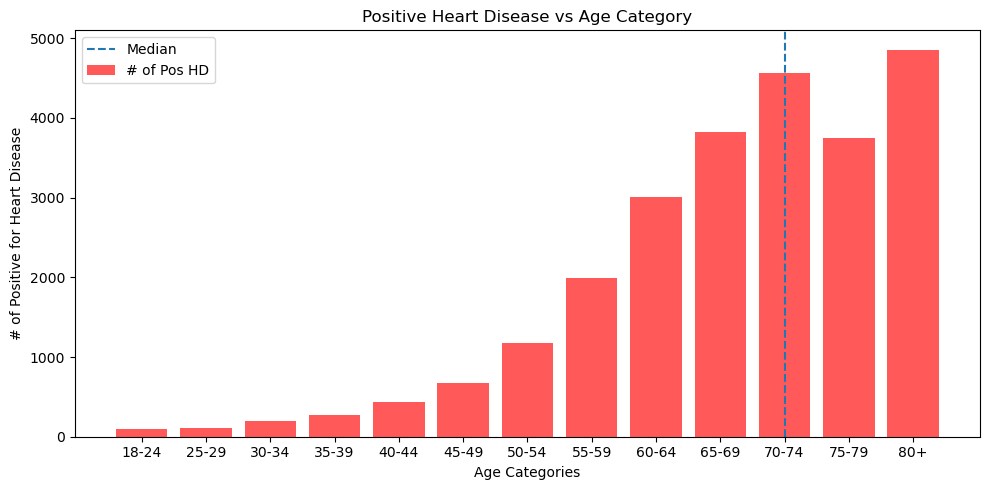

In [30]:
# create a histogram showing essentially how many people in each age group have heart disease.
age_grouped = pos_hd.groupby("Age Category").count()
age_grouped

x_axis = np.arange(len(age_grouped))

# Set figure size to make data clearer to read
plt.figure(figsize=(10,5))

x_values = age_grouped.index
y_values = age_grouped["Heart Disease"]

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, age_grouped.index)

plt.bar(x_axis, y_values, color='r', alpha=0.65, align="center", label="# of Pos HD")
plt.title("Positive Heart Disease vs Age Category")
plt.xlabel("Age Categories")
plt.ylabel("# of Positive for Heart Disease")

# plot the median 
plt.axvline(x=10,ls='--', label="Median")
plt.legend(loc="best")

plt.tight_layout()
plt.savefig("Images/pos_hd_vs_age_median.png")
plt.show()


# Positive Heart Disease vs Age Category: Results and Interpretations
Here we see a definite skew towards a higher rate of heart disease as we increase the Age Category. More than 88% of the positive cases appear in participants 55 years or older, which only represents approx half of the people surveyed (54.4%).

Using the total count of postive cases of heart disease divided by 2, and the Age Category counts, I was able to determien the median of the positive cases lies in the 70-74 Age Category. Again, showing more than 50% of the cases lie somewhere above the 70 year gae mark.

It is clear there is a relationship between an older age and incidence of heart disease.

At this point I wanted to determine if the age distribution of respondents is equal across all age groups.

The following bar graph clearly shows this was not the case.

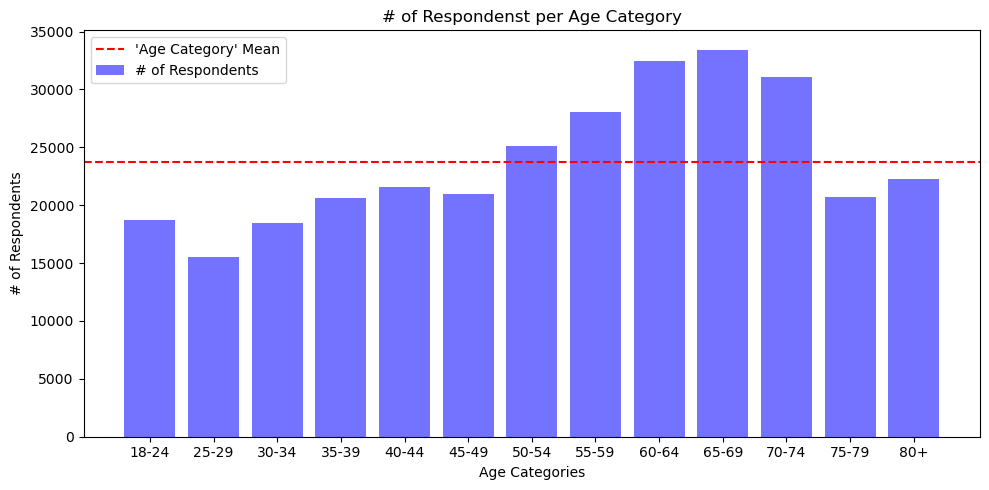

In [32]:
# Is there an even distribution in the sampling data age groups

age_grouped = cleaned_data.groupby("Age Category").count()
age_grouped

x_axis = np.arange(len(age_grouped))

# NOTE: Need to determine why figsize isn't working
plt.figure(figsize=(10, 5))

x_values = age_grouped.index
y_values = age_grouped["General Health"]

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, age_grouped.index)

plt.bar(x_axis, y_values, color='b', alpha=0.55, align="center", label="# of Respondents")

plt.title("# of Respondenst per Age Category")
plt.xlabel("Age Categories")
plt.ylabel("# of Respondents")

plt.axhline(y=age_grouped["General Health"].mean(), color='r', ls='--', label="'Age Category' Mean")

plt.legend(loc="best")

plt.tight_layout()
plt.savefig("Images/num_resp_per_age.png")
plt.show()


# Chi Square Testing

As the number of respondents per age category was not evenly distributed, we will need to adjust the number of expected cases for wach actual age group based on percentage of positive cases for the dataset as a whole (See previous bar graph).

To see if the distribution of positive heart disease cases across age groups matched the percentage of heart disease for the entire sample, a chi square test was performed on the expected number of pos cases per age group based on the overall pecentage of the group, versus the observed number of cases per age group.

## Null Hypothesis:
The number of positive cases of heart disease per age group will be 8.1% of the total number of repsondents in the age group.

## Alternative Hypothesis
There is a higher prevalance of heart disease as a respondents age increases, and therefore we will not see the number of positive cases of heart disease for each age group evenly distributed as 8.1%.

Using 12 degrees of freedom and 95% confidence we calculated a critical value of approx 21.03. When we run the chi square analysis, we get a statistical value of 16574.54, WELL ABOVE the 21.03. Additionally, the returned p-value is so low as to register as 0.0.

Clearly, the results are significant and we can reject the Null Hypothesis.

In [50]:
# Age Category versus Pos Heart Disease Chi square testing. . .
# Null: % of Pos Heart Disease in each age group is within 95% confidence
# Alternative: They are not, and age is related to the incidence of heart disease
# use 95% confidence level

# create cleaned age count dataframe
cl_age_count = pd.DataFrame(cleaned_data["Age Category"].value_counts())
# add observed and default columns
cl_age_count["obs_pos_hd"] = pos_hd["Age Category"].value_counts()
cl_age_count["exp_pos_hd"] = round((cl_age_count["Age Category"] * 0.08085))
print(cl_age_count)

print(cl_age_count["obs_pos_hd"].sum())
print(cl_age_count["exp_pos_hd"].sum())

# evalute critical value and perform chi square
# determine critical value
# degree of freedom = 13 - 1 = 12
critical_value = stats.chi2.ppf(q=0.95, df=12)
print(critical_value)

# run chi square
stats.chisquare(cl_age_count['obs_pos_hd'], cl_age_count['exp_pos_hd'])


       Age Category  obs_pos_hd  exp_pos_hd
65-69         33434        3823      2703.0
60-64         32418        3012      2621.0
70-74         31103        4561      2515.0
55-59         28054        1991      2268.0
50-54         25097        1181      2029.0
80+           22271        4856      1801.0
40-44         21595         435      1746.0
45-49         20968         678      1695.0
75-79         20705        3752      1674.0
35-39         20606         274      1666.0
18-24         18681          94      1510.0
30-34         18428         201      1490.0
25-29         15494         113      1253.0
24971
24971.0
21.02606981748307


Power_divergenceResult(statistic=16574.542596877378, pvalue=0.0)

# Convert Categorical 'Age Category' to Ordinal Data

In [16]:
# convert categorical data to ordinal data
# reference: https://stackoverflow.com/questions/34007308/linear-regression-analysis-with-string-categorical-features-variables

age_data = pd.DataFrame(pos_hd["Age Category"])
age_data["Age Category"] = age_data["Age Category"].astype("category")
age_data["Age Category"] = age_data["Age Category"].cat.reorder_categories(["18-24", "25-29","30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70-74", "75-79", "80+"])
age_data["Age Category"] = age_data["Age Category"].cat.codes
age_data


,Age Category
1,10
3,11
6,8
10,11
11,11
...,...
308779,8
308800,8
308803,7
308809,11


# Perform Linear Regression and Correlation Analysis

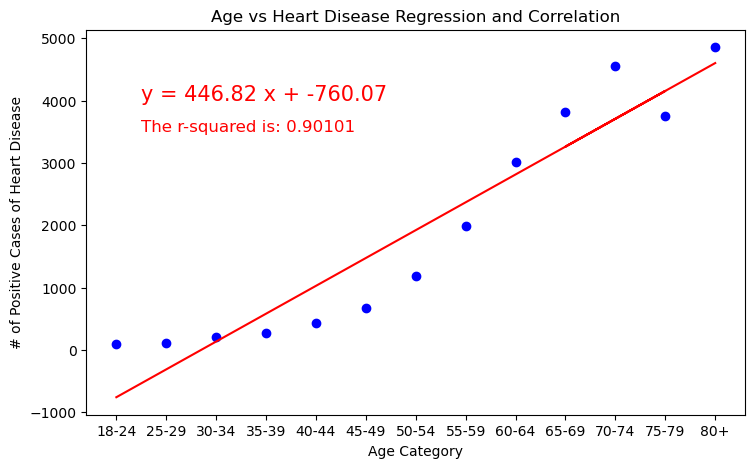

In [37]:
# plot and perform linear regression
cat_counts = age_data["Age Category"].value_counts()
cat_counts

plt.figure(figsize=(8.5, 5))
x_axis = np.arange(len(cat_counts))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, age_grouped.index)


x_values = cat_counts.index
y_values = age_data["Age Category"].value_counts()

(slope, y_int, r_value, p_value, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + y_int
line_eq = f"y = {round(slope, 2)} x + {round(y_int, 2)}"

plt.scatter(x_values, y_values, color='b')
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (0.5, 4000), fontsize=15, color="red")
r_squared = f"The r-squared is: {round(r_value**2, 5)}"
plt.annotate(r_squared, (0.5, 3500), fontsize=12, color="red")

plt.xlabel("Age Category")
plt.ylabel("# of Positive Cases of Heart Disease")

plt.title("Age vs Heart Disease Regression and Correlation")


plt.savefig("Images/linregress_correlation.png")
plt.show()

## Linear Regression and Correlation Results Analysis

There is clearly a strong, positive correlation between an increase in age and an increase in the incidence of heart disease.

Rather than a simple linear regression, a best fit curve analysis should be performed to get a more precise representation of the realtionship between age and heart disease.